In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('delivery_time (1).csv')

In [10]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
#Renaming coloumn names

In [11]:
data = data.rename(columns = {'Delivery Time' : 'deliverytime', 'Sorting Time':'sortingtime'})

In [12]:
data

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deliverytime  21 non-null     float64
 1   sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [15]:
#correlation
data.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


In [16]:
#plotting histogram
import seaborn as sn

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliverytime', ylabel='Density'>

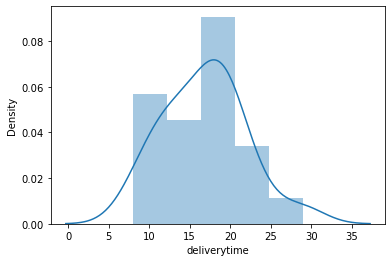

In [17]:
sn.distplot(data['deliverytime'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sortingtime', ylabel='Density'>

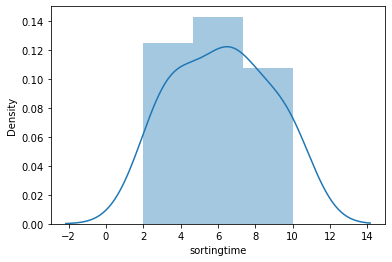

In [18]:
sn.distplot(data['sortingtime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dcc59a2700>,
 'caps': [<matplotlib.lines.Line2D at 0x1dcc59a2dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dcc59a23a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dcc59ad4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dcc59ad820>],
 'means': []}

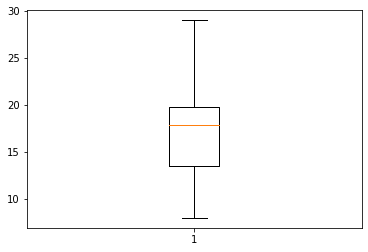

In [19]:
plt.boxplot(data.deliverytime)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

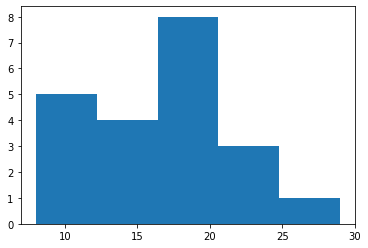

In [23]:
plt.hist(data.deliverytime, bins=5)

In [25]:
# building a model
import statsmodels.formula.api as smf

In [33]:
model= smf.ols('deliverytime~sortingtime',data=data).fit()

<AxesSubplot:xlabel='deliverytime', ylabel='sortingtime'>

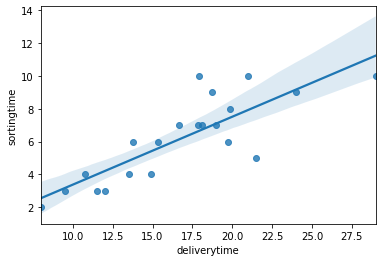

In [32]:
sn.regplot(x="deliverytime", y="sortingtime",data=data)

In [34]:
#coefficients
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [35]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [36]:
#r squared and r squared adjecent values
print(model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.98e-06
Time:                        16:42:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""